Test Accuracy: 72.0%


/Users/boin/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


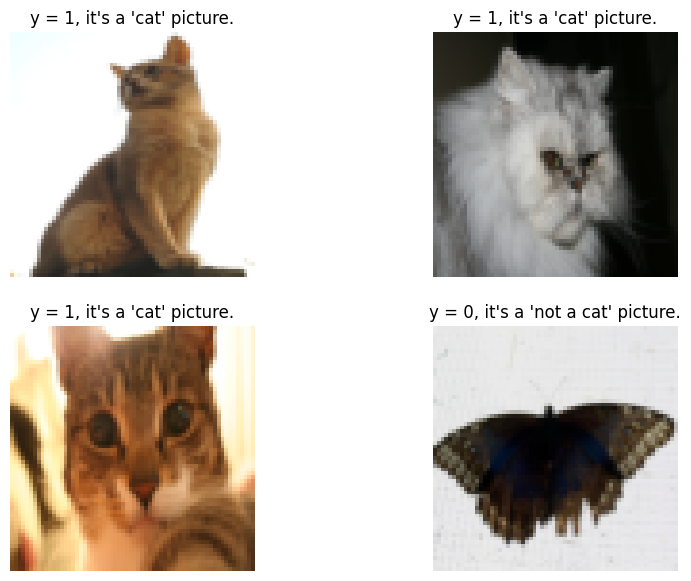

In [3]:
import h5py
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Load the dataset
train_data = h5py.File('/Users/boin/Desktop/23F/AMS595/Python2/train_catvnoncat.h5', "r")
test_data = h5py.File('/Users/boin/Desktop/23F/AMS595/Python2/test_catvnoncat.h5', "r")

train_X = np.array(train_data['train_set_x'][:]) 
train_Y = np.array(train_data['train_set_y'][:]) 

test_X = np.array(test_data['test_set_x'][:]) 
test_Y = np.array(test_data['test_set_y'][:])

# Reshape images into 1D array and normalize if needed
train_X_reshaped = train_X.reshape(train_X.shape[0], -1) / 255.0 
test_X_reshaped = test_X.reshape(test_X.shape[0], -1) / 255.0 

# Create and fit model 
classifier_model = LogisticRegression()
classifier_model.fit(train_X_reshaped, train_Y)

# Predict on test set 
predictions_test = classifier_model.predict(test_X_reshaped)

# Find incorrect predictions 
incorrect_predictions_test_indices = [index for index, (actual, predicted) in enumerate(zip(test_Y, predictions_test)) if actual != predicted]

print(f"Test Accuracy: {100 - len(incorrect_predictions_test_indices)/len(test_Y)*100}%")

# the indices of images that we want to look at
indices = incorrect_predictions_test_indices[:4]

# create figure
fig = plt.figure(figsize=(10, 7))

# setting values to rows and column variables
rows = 2
columns = 2

classes = {0: "not a cat", 1: "cat"}

for i in range(4):
    fig.add_subplot(rows, columns, i+1) # subplot indices are 1-based.
    plt.imshow(test_X[indices[i]])
    plt.axis('off')
    plt.title("y = " + str(test_Y[indices[i]]) + ", it's a '" + classes[test_Y[indices[i]]] + "' picture.")

